In [831]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [832]:
data = pd.read_csv("my_file (1).csv")

In [833]:
data.head()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [834]:
data.tail()

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
15,16,NaN,NaN,"$184,000,000","$227,452,347",Pink,The Truth About Love Tour,2013–2014,142,"$1,295,775",[22]
16,17,NaN,NaN,"$170,000,000","$213,568,571",Lady Gaga,Born This Way Ball,2012–2013,98,"$1,734,694",[d]
17,18,NaN,NaN,"$169,800,000","$207,046,755",Madonna,Rebel Heart Tour,2015–2016,82,"$2,070,732",[4]
18,19,NaN,NaN,"$167,700,000[e]","$204,486,106",Adele,Adele Live 2016,2016–2017,121,"$1,385,950",[25]
19,20,NaN,NaN,"$150,000,000","$185,423,109",Taylor Swift,The Red Tour,2013–2014,86,"$1,744,186",[26]


In [835]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


In [836]:
data.describe()

,Rank,Shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [837]:
data.shape

(20, 11)

In [838]:
data.columns

Index(['Rank', 'Peak', 'All Time Peak', 'Actual gross',
       'Adjusted gross (in 2022 dollars)', 'Artist', 'Tour title', 'Year(s)',
       'Shows', 'Average gross', 'Ref.'],
      dtype='object')

In [839]:
data.isnull().sum()

Rank                                 0
Peak                                11
All Time Peak                       14
Actual gross                         0
Adjusted gross (in 2022 dollars)     0
Artist                               0
Tour title                           0
Year(s)                              0
Shows                                0
Average gross                        0
Ref.                                 0
dtype: int64

In [840]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
print(missing_percentage)

Rank                                 0.0
Peak                                55.0
All Time Peak                       70.0
Actual gross                         0.0
Adjusted gross (in 2022 dollars)     0.0
Artist                               0.0
Tour title                           0.0
Year(s)                              0.0
Shows                                0.0
Average gross                        0.0
Ref.                                 0.0
dtype: float64


In [841]:
# Example dictionary to map old names to new names
rename_dict = {
    'Rank': 'rank',
    'Peak': 'peak',
    'All Time Peak': 'all_time_peak',
    'Actual gross': 'actual_gross',
    'Adjusted gross (in 2022 dollars)': 'adjusted_gross_2022',
    'Artist': 'artist',
    'Tour title': 'tour_title',
    'Year(s)': 'years',
    'Shows': 'shows',
    'Average gross': 'average_gross',
    'Ref.': 'reference'
}

# Rename columns
data = data.rename(columns=rename_dict)



In [842]:
data.head()


,rank,peak,all_time_peak,Actual gross,Adjusted gross (in 2022 dollars),artist,tour_title,years,shows,average_gross,reference
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]


In [843]:
data.columns = data.columns.str.strip()  # Remove any leading/trailing spaces


In [844]:
# Replace the column name using regex to clean up potential hidden characters
data.columns = data.columns.str.replace(r'[^\x00-\x7F]+', '', regex=True)  # Remove non-ASCII characters


In [845]:
print(data.columns)

Index(['rank', 'peak', 'all_time_peak', 'Actualgross',
       'Adjustedgross (in 2022 dollars)', 'artist', 'tour_title', 'years',
       'shows', 'average_gross', 'reference'],
      dtype='object')


In [846]:
# Find duplicate rows
duplicates = data.duplicated()
print(duplicates.sum())

# Drop duplicate rows
data = data.drop_duplicates()


0


In [847]:
print(data.dtypes)


rank                                int64
peak                               object
all_time_peak                      object
Actualgross                        object
Adjustedgross (in 2022 dollars)    object
artist                             object
tour_title                         object
years                              object
shows                               int64
average_gross                      object
reference                          object
dtype: object


In [848]:
data.describe()

,rank,shows
count,20.000000,20.000000
mean,10.450000,110.000000
std,5.942488,66.507617
min,1.000000,41.000000
25%,5.750000,59.000000
50%,10.500000,87.000000
75%,15.250000,134.500000
max,20.000000,325.000000


In [849]:
data.isnull().sum()

rank                                0
peak                               11
all_time_peak                      14
Actualgross                         0
Adjustedgross (in 2022 dollars)     0
artist                              0
tour_title                          0
years                               0
shows                               0
average_gross                       0
reference                           0
dtype: int64

In [850]:
# Drop the specified columns
data = data.drop(columns=['reference', 'peak', 'all_time_peak'], axis=1)


In [851]:
data.head()

,rank,Actualgross,Adjustedgross (in 2022 dollars),artist,tour_title,years,shows,average_gross
0,1,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571"
1,2,"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571"
2,3,"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294"
3,4,"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795"
4,5,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173"


In [852]:
data.isnull().sum()

rank                               0
Actualgross                        0
Adjustedgross (in 2022 dollars)    0
artist                             0
tour_title                         0
years                              0
shows                              0
average_gross                      0
dtype: int64

In [853]:
# Remove any non-numeric characters except for '.' and ',' using regex
data['Actualgross'] = data['Actualgross'].replace(r'[^0-9.]', '', regex=True).astype(float)
data['Adjustedgross (in 2022 dollars)'] = data['Adjustedgross (in 2022 dollars)'].replace(r'[^0-9.]', '', regex=True).astype(float)
data['average_gross'] = data['average_gross'].replace(r'[^0-9.]', '', regex=True).astype(float)

# Check the data types after conversion
print(data.dtypes)


rank                                 int64
Actualgross                        float64
Adjustedgross (in 2022 dollars)    float64
artist                              object
tour_title                          object
years                               object
shows                                int64
average_gross                      float64
dtype: object


In [854]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['artist', 'tour_title', 'years'], drop_first=True)

# Verify the new columns
print(data_encoded.head())


   rank  Actualgross  Adjustedgross (in 2022 dollars)  shows  average_gross  \
0     1  780000000.0                      780000000.0     56     13928571.0   
1     2  579800000.0                      579800000.0     56     10353571.0   
2     3  411000000.0                      560622615.0     85      4835294.0   
3     4  397300000.0                      454751555.0    156      2546795.0   
4     5  345675146.0                      402844849.0     53      6522173.0   

   artist_Beyoncé  artist_Celine Dion  artist_Cher  artist_Katy Perry  \
0           False               False        False              False   
1            True               False        False              False   
2           False               False        False              False   
3           False               False        False              False   
4           False               False        False              False   

   artist_Lady Gaga  ...  years_2013–2014  years_2014–2015  years_2015  \
0           

In [855]:
import matplotlib.pyplot as plt
import seaborn as sns


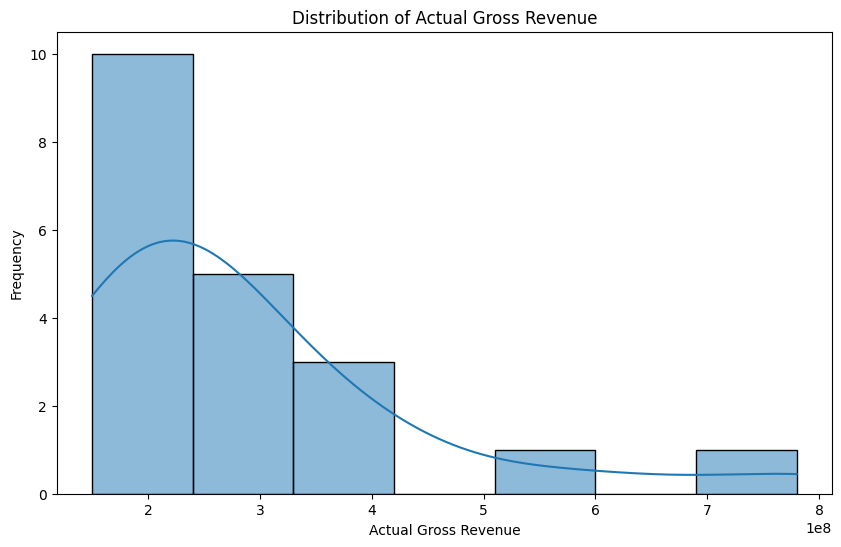

In [923]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histogram of Actualgross
plt.figure(figsize=(10,6))
sns.histplot(data['Actualgross'], kde=True)
plt.title('Distribution of Actual Gross Revenue')
plt.xlabel('Actual Gross Revenue')
plt.ylabel('Frequency')
plt.show()


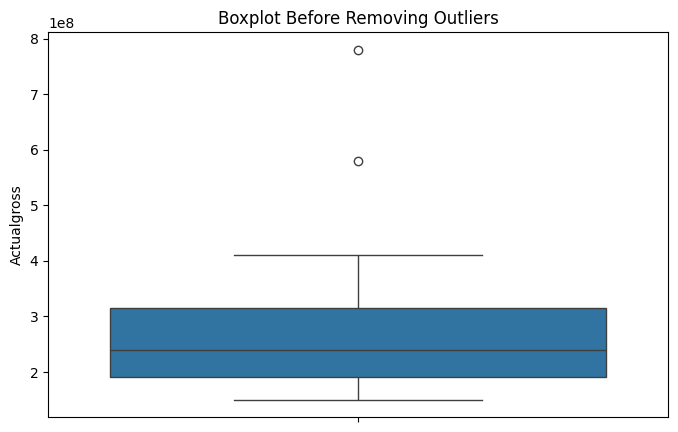

In [861]:
plt.figure(figsize=(8, 5))
sns.boxplot(data['Actualgross'])
plt.title('Boxplot Before Removing Outliers')
plt.show()


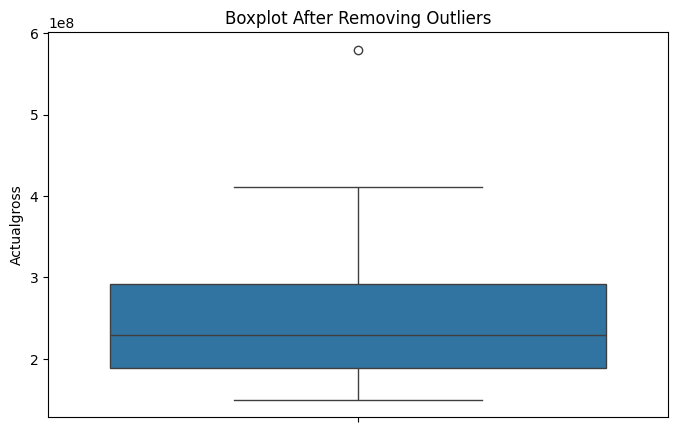

In [862]:
plt.figure(figsize=(8, 5))
sns.boxplot(data_cleaned['Actualgross'])
plt.title('Boxplot After Removing Outliers')
plt.show()


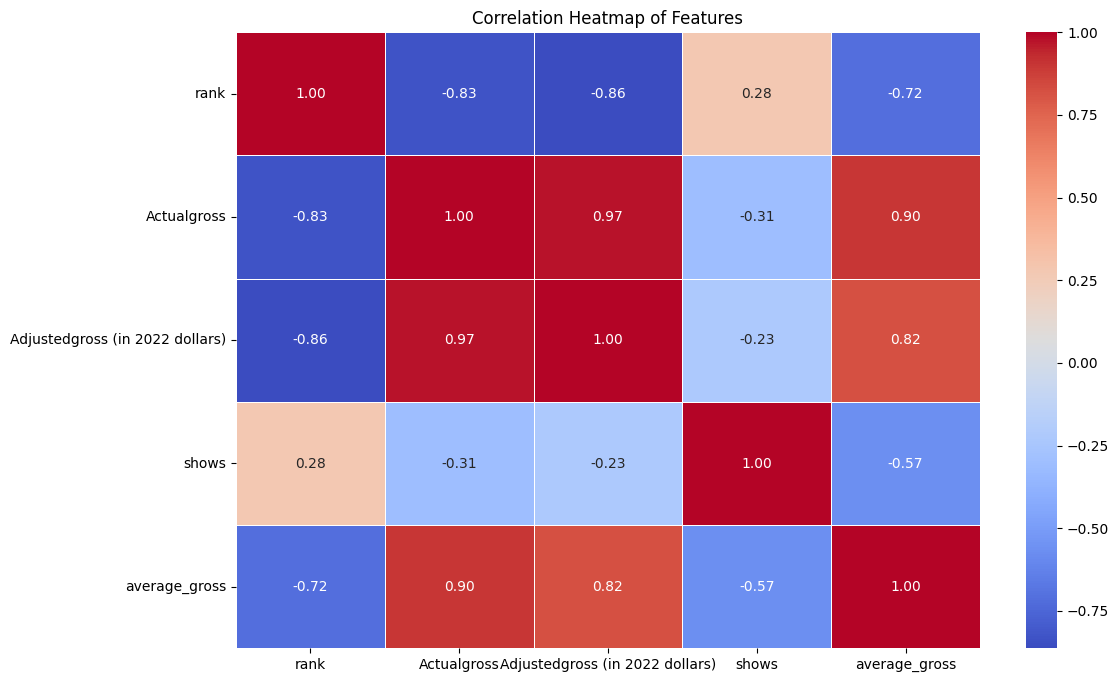

In [935]:
# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=['artist', 'tour_title'], drop_first=True)

# Select only numeric columns for correlation after encoding
numeric_data = data_encoded.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


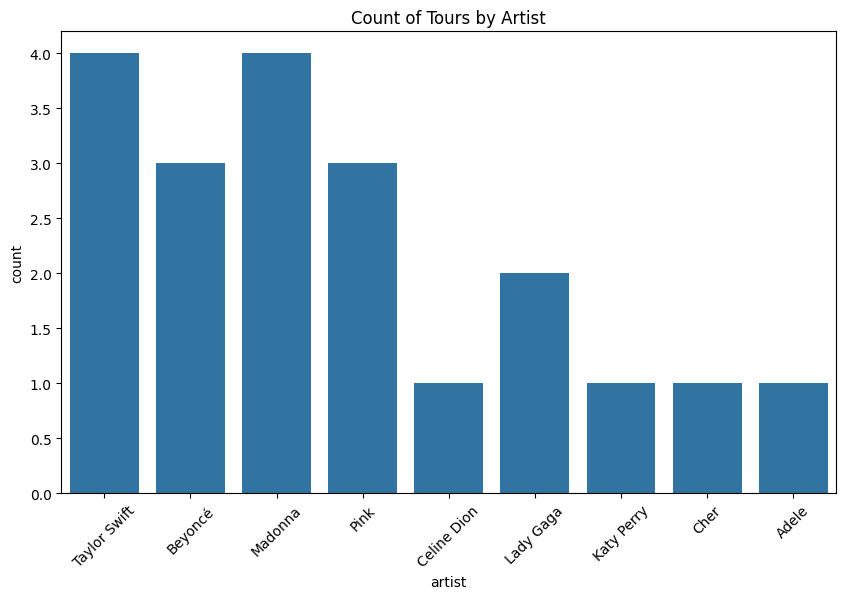

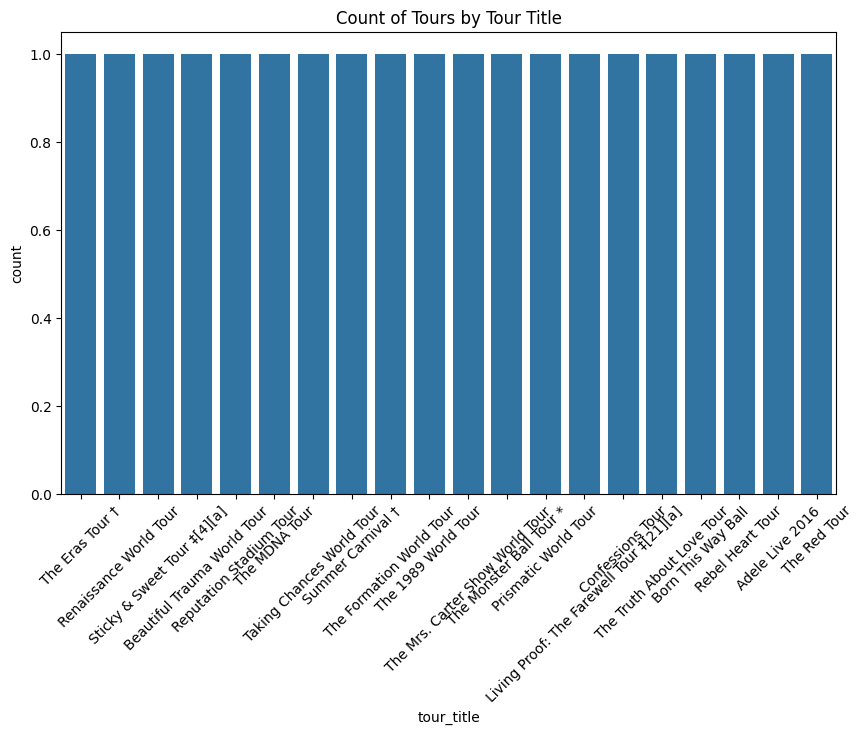

In [927]:
# Countplot for 'artist'
plt.figure(figsize=(10,6))
sns.countplot(x='artist', data=data)
plt.title('Count of Tours by Artist')
plt.xticks(rotation=45)
plt.show()

# Countplot for 'tour_title'
plt.figure(figsize=(10,6))
sns.countplot(x='tour_title', data=data)
plt.title('Count of Tours by Tour Title')
plt.xticks(rotation=45)
plt.show()


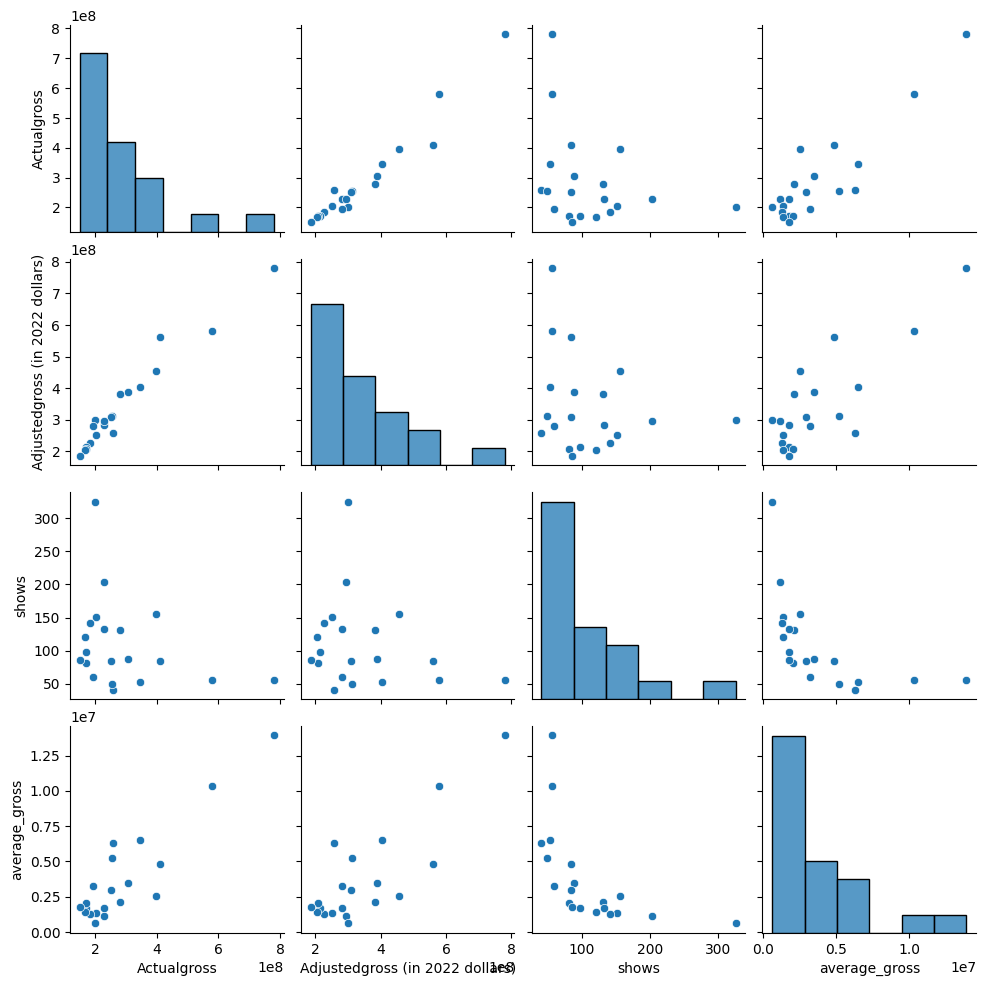

In [929]:
# Pairplot to visualize relationships between features
sns.pairplot(data[['Actualgross', 'Adjustedgross (in 2022 dollars)', 'shows', 'average_gross']])
plt.show()


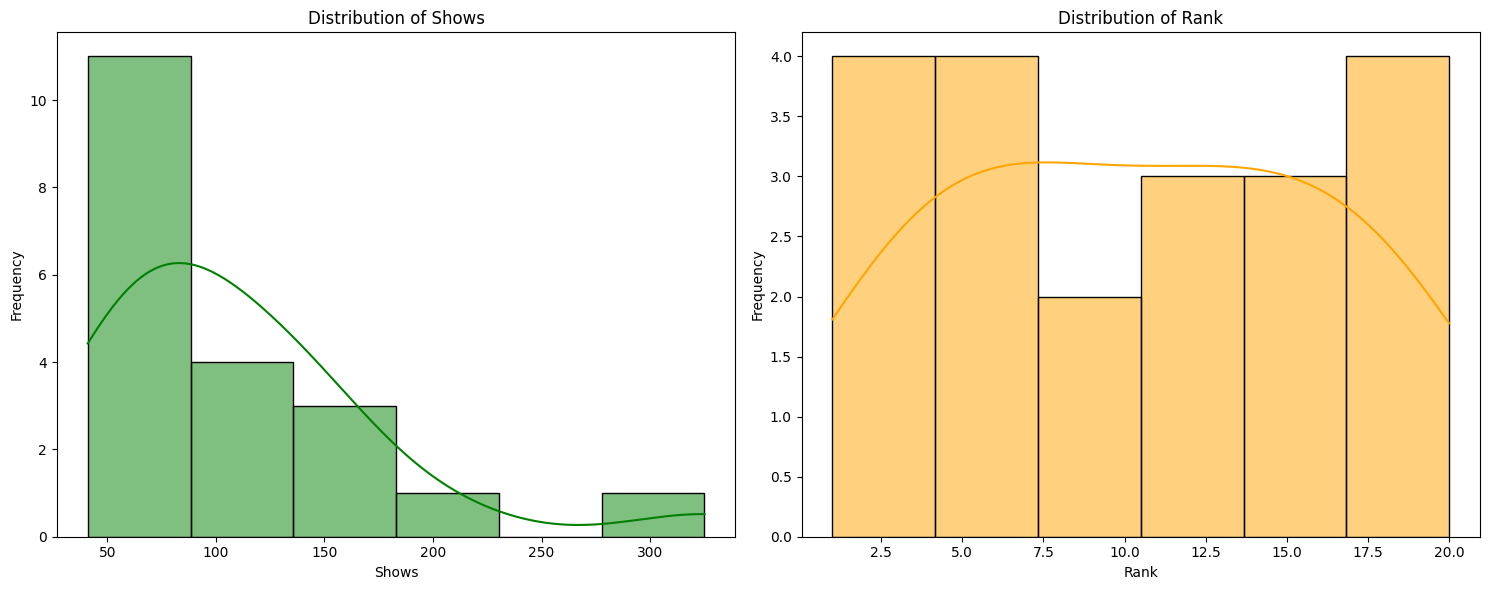

In [857]:
# Distribution of 'Shows' and 'Rank'
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# 'Shows' distribution
sns.histplot(data['shows'], kde=True, color='green', ax=ax[0])
ax[0].set_title('Distribution of Shows')
ax[0].set_xlabel('Shows')
ax[0].set_ylabel('Frequency')

# 'Rank' distribution
sns.histplot(data['rank'], kde=True, color='orange', ax=ax[1])
ax[1].set_title('Distribution of Rank')
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [858]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['Actualgross'].quantile(0.25)
Q3 = data['Actualgross'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Remove outliers from the 'Actual gross' column
data_cleaned = data[(data['Actualgross'] >= lower_limit) & (data['Actualgross'] <= upper_limit)]

# Check the number of rows before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (20, 8)
Cleaned data shape: (18, 8)


In [859]:
data.head()


,rank,Actualgross,Adjustedgross (in 2022 dollars),artist,tour_title,years,shows,average_gross
0,1,780000000.0,780000000.0,Taylor Swift,The Eras Tour †,2023–2024,56,13928571.0
1,2,579800000.0,579800000.0,Beyoncé,Renaissance World Tour,2023,56,10353571.0
2,3,411000000.0,560622615.0,Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,4835294.0
3,4,397300000.0,454751555.0,Pink,Beautiful Trauma World Tour,2018–2019,156,2546795.0
4,5,345675146.0,402844849.0,Taylor Swift,Reputation Stadium Tour,2018,53,6522173.0


In [860]:
from scipy import stats

# Calculate Z-scores for the 'Actual gross' column
z_scores = stats.zscore(data['Actualgross'])

# Define the threshold for Z-score
threshold = 3

# Filter out rows where the absolute Z-score is greater than the threshold
data_cleaned = data[(abs(z_scores) < threshold)]

# Check the number of rows before and after removing outliers
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (20, 8)
Cleaned data shape: (19, 8)


In [863]:
# Define the columns to remove outliers from
columns_to_check = ['Actualgross', 'shows', 'rank']

# Apply the IQR method to each column
for col in columns_to_check:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    data_cleaned = data_cleaned[(data_cleaned[col] >= lower_limit) & (data_cleaned[col] <= upper_limit)]

# Check the cleaned data
print(f"Original data shape: {data.shape}")
print(f"Cleaned data shape: {data_cleaned.shape}")


Original data shape: (20, 8)
Cleaned data shape: (17, 8)


In [900]:
# Define features (X) and target (y)
X = data_encoded.drop(columns=['Actualgross'])  # Drop the target column
y = data_encoded['Actualgross']  # Target column

# Check the shapes of X and y
print(X.shape, y.shape)


(20, 46) (20,)


In [905]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(16, 46) (4, 46) (16,) (4,)


In [907]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled features
print(X_train_scaled[:5])


[[-0.34115913 -0.05685516 -0.98116321  1.27381284  2.64575131 -0.25819889
  -0.25819889 -0.25819889 -0.37796447 -0.48038446 -0.37796447 -0.48038446
  -0.25819889 -0.25819889 -0.25819889 -0.25819889 -0.25819889  0.
   0.         -0.25819889 -0.25819889 -0.25819889 -0.25819889 -0.25819889
   0.          3.87298335 -0.25819889 -0.25819889 -0.25819889 -0.25819889
   0.         -0.25819889 -0.37796447 -0.25819889 -0.25819889 -0.25819889
  -0.37796447 -0.25819889 -0.25819889  0.          3.87298335 -0.25819889
  -0.25819889 -0.25819889  0.         -0.25819889]
 [-0.92600334  0.744158   -0.41426891  0.2982175  -0.37796447 -0.25819889
  -0.25819889 -0.25819889 -0.37796447  2.081666   -0.37796447 -0.48038446
  -0.25819889 -0.25819889 -0.25819889 -0.25819889 -0.25819889  0.
   0.         -0.25819889 -0.25819889 -0.25819889 -0.25819889 -0.25819889
   0.         -0.25819889  3.87298335 -0.25819889 -0.25819889 -0.25819889
   0.         -0.25819889 -0.37796447 -0.25819889  3.87298335 -0.25819889
  -

In [909]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 167814035.4419719
Mean Squared Error: 4.8716954888827176e+16
R2 Score: 0.28659002855242854


In [911]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model using the test set
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared (goodness of fit)

# Display the evaluation results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")


Mean Absolute Error: 167814035.4419719
Mean Squared Error: 4.8716954888827176e+16
R2 Score: 0.28659002855242854


In [913]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_model = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data
tree_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test_scaled)

# Evaluate the model
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree MAE: {mae_tree}")
print(f"Decision Tree MSE: {mse_tree}")
print(f"Decision Tree R2: {r2_tree}")


Decision Tree MAE: 149750000.0
Decision Tree MSE: 4.5088395e+16
Decision Tree R2: 0.33972657644610005


In [915]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest MSE: {mse_rf}")
print(f"Random Forest R2: {r2_rf}")


Random Forest MAE: 157688905.0325
Random Forest MSE: 5.337911748420702e+16
Random Forest R2: 0.2183174263004214


In [917]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the model
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting MAE: {mae_gb}")
print(f"Gradient Boosting MSE: {mse_gb}")
print(f"Gradient Boosting R2: {r2_gb}")


Gradient Boosting MAE: 141106445.58862662
Gradient Boosting MSE: 4.25397543093066e+16
Gradient Boosting R2: 0.3770488123396799


In [919]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and model
print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test_scaled)
mae_best = mean_absolute_error(y_test, y_pred_best)
print(f"Best Model MAE: {mae_best}")


Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Model MAE: 158794868.755


In [921]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation for Random Forest Regressor
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print average MAE from cross-validation
print(f"Average MAE from Cross-Validation: {-cv_scores.mean()}")


Average MAE from Cross-Validation: 19336190.097999997
